### Working with larger example (Multi class Classification)

In [1]:
# Imports

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [2]:
print(f"Training sample: \n{train_data[0]}\n")
print(f"Testing Sample: \n{train_labels[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

Labels

Each training and test example is assigned to one of the following labels:

+ 0 T-shirt/top
+ 1 Trouser
+ 2 Pullover
+ 3 Dress
+ 4 Coat
+ 5 Sandal
+ 6 Shirt
+ 7 Sneaker
+ 8 Bag
+ 9 Ankle boot

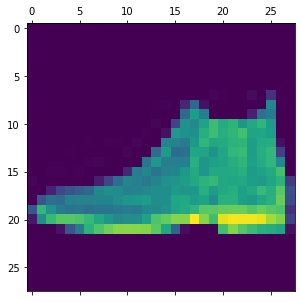

In [3]:
plt.matshow(test_data[0]);

In [4]:
train_labels[0] # Ankle Boot

9

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

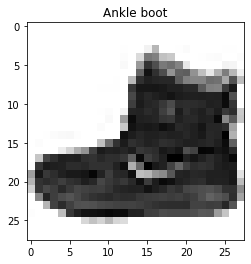

In [6]:
index :int = 0
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

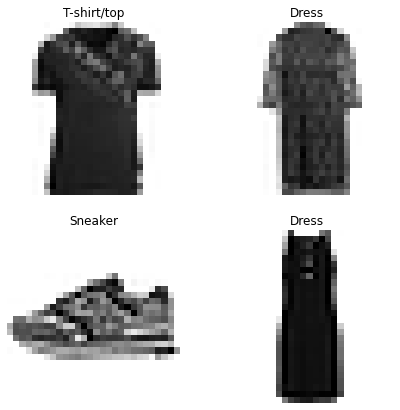

In [7]:
# Plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_inx = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_inx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_inx]])
    plt.axis(False)


### Building a multi-class classification model

Most of the thing is same as Binary classification, but we need to tweak some parameters.

+ **Input Shape** : 28*28 (shape of one image)
+ **Output Shape** : 10 (as we have 10 class)
+ **Loss Function** : CategoricalCrossentropy()
    + If labels are one hot encodeed use CategoricalCrossentropy else use Sparse categorical entropy
+ **Output layer activatio** : Softmax

In [8]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

# Our data needs to be falttend from (28,28) to (None, 784)

(None, 784)

In [9]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

no_norm_history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data,test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4900 - accuracy: 0.0983 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3031 - accuracy: 0.0987 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3031 - val_accuracy:

In [10]:
# Check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Check min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled or normalized, this means they like to have the numbers in the terms between 0 and 1

In [12]:
train_data_norm = train_data/255.0
test_data_norm  =test_data/255.0


test_data_norm.max(), train_data.min()

(1.0, 0)

In [13]:
# Modelling

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

norm_history = model_2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3451 - accuracy: 0.5089 - val_loss: 0.9825 - val_accuracy: 0.6608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8818 - accuracy: 0.6839 - val_loss: 0.8405 - val_accuracy: 0.6935
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7888 - accuracy: 0.7004 - val_loss: 0.7901 - val_accuracy: 0.7031
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7435 - accuracy: 0.7131 - val_loss: 0.7571 - val_accuracy: 0.7077
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7167 - accuracy: 0.7222 - val_loss: 0.7328 - val_accuracy: 0.7134
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6971 - accuracy: 0.7345 - val_loss: 0.7371 - val_accuracy: 0.7211
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6798 - accuracy: 0.7462 - val_loss: 0.6871 - val_accuracy:

<AxesSubplot:title={'center':'Normalized Data'}>

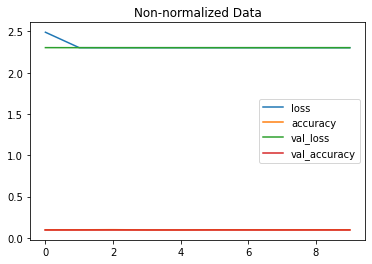

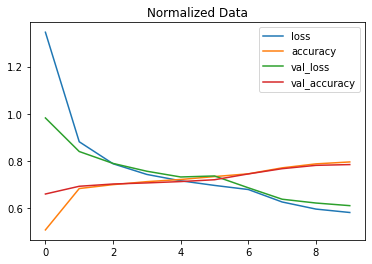

In [14]:
# Plotting non-normalized data loss curves
pd.DataFrame(no_norm_history.history).plot(title="Non-normalized Data")

# Plotting normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

**Note** : The same model with even slightly different data can produce dynamically different results. It is important to compare them on same criteria.

In [15]:
tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create learning rate callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))

find_lr_history = model_3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_sheduler]
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9847 - accuracy: 0.6123 - val_loss: 0.7353 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6881 - accuracy: 0.7444 - val_loss: 0.6707 - val_accuracy: 0.7665 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6218 - accuracy: 0.7796 - val_loss: 0.6299 - val_accuracy: 0.7796 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5828 - accuracy: 0.7963 - val_loss: 0.6060 - val_accuracy: 0.7865 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5638 - accuracy: 0.8035 - val_loss: 0.5882 - val_accuracy: 0.7932 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5524 - accuracy: 0.8074 - val_loss: 0.6105 - val_accuracy: 0.7886 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

<AxesSubplot:title={'center':'Learning'}>

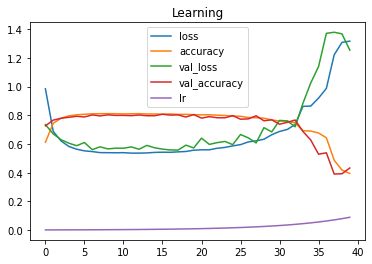

In [16]:
pd.DataFrame(find_lr_history.history).plot(title='Learning')

Text(0.5, 1.0, 'Finding the ideal learning rate')

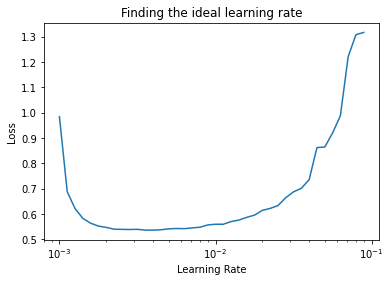

In [17]:
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [18]:
# LEt's refit the model with ideal learning rate

tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history_4 = model_4.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3548 - accuracy: 0.5410 - val_loss: 0.9511 - val_accuracy: 0.6929
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8517 - accuracy: 0.7043 - val_loss: 0.8144 - val_accuracy: 0.7143
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7673 - accuracy: 0.7324 - val_loss: 0.7719 - val_accuracy: 0.7344
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7223 - accuracy: 0.7488 - val_loss: 0.7448 - val_accuracy: 0.7416
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7002 - accuracy: 0.7533 - val_loss: 0.7268 - val_accuracy: 0.7462
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6861 - accuracy: 0.7574 - val_loss: 0.7282 - val_accuracy: 0.7501
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6757 - accuracy: 0.7618 - val_loss: 0.7205 - val_accuracy:

<AxesSubplot:>

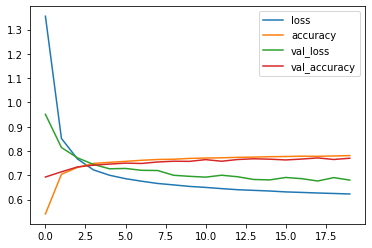

In [19]:
pd.DataFrame(history_4.history).plot()

In [20]:
# Predictions

y_probs = model_4.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[3.3067338e-16, 4.2451242e-07, 2.3572446e-14, 4.3481088e-10,
        1.3978180e-10, 7.9039812e-02, 1.9300670e-12, 3.3022368e-01,
        8.9182531e-06, 5.9072715e-01],
       [2.3928422e-05, 2.9423051e-15, 8.4116316e-01, 1.8135353e-11,
        9.0682626e-02, 1.5111394e-17, 6.8100139e-02, 2.2505795e-08,
        3.0176097e-05, 9.5772712e-10],
       [2.3822249e-03, 9.7899318e-01, 3.2880343e-05, 5.9191003e-03,
        9.3756344e-06, 6.2841065e-03, 1.6739614e-04, 3.9824223e-04,
        9.9589613e-07, 5.8124475e-03],
       [2.3822249e-03, 9.7899318e-01, 3.2880343e-05, 5.9191003e-03,
        9.3756344e-06, 6.2841065e-03, 1.6739614e-04, 3.9824223e-04,
        9.9589613e-07, 5.8124475e-03],
       [1.8679823e-01, 4.3499059e-04, 2.2715606e-01, 2.4503425e-02,
        1.1011045e-01, 1.0502210e-05, 4.4728121e-01, 9.6851104e-04,
        2.4420863e-03, 2.9466764e-04]], dtype=float32)

### Evaluate multi-class classification model

To evaluate our multi class classification model, we could:
+ Evaluate its performance using other classification metrics(Confusion matrix)
+ Asses some of it's predictions
+ Improve the result (by training for longer or changing architecture)
+ Save and export it for use in other application 

In [21]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 20), text_size=15):

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretiffy
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)


    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axis

    ax.set(
        title='Confusion Matrix',
        xlabel="Predicated Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max()+cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i, j] > threshold else "black", size=15
                 )


In [22]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.3067338e-16, 4.2451242e-07, 2.3572446e-14, 4.3481088e-10,
        1.3978180e-10, 7.9039812e-02, 1.9300670e-12, 3.3022368e-01,
        8.9182531e-06, 5.9072715e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [23]:
# Convert all preditions probabilities

y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

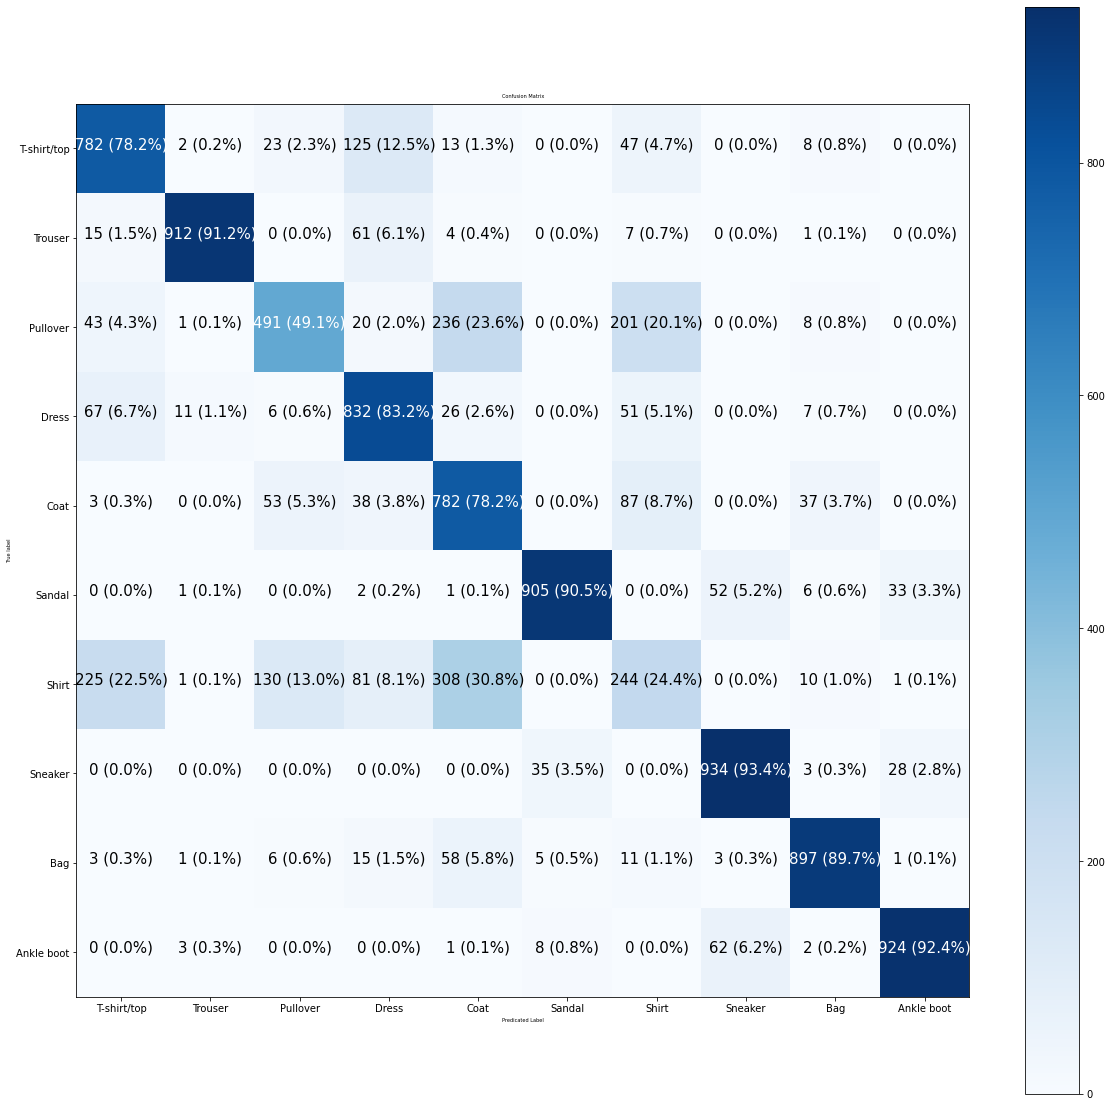

In [24]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names, figsize=(20,20), text_size=5)

Often working with image and other froms of visual data, it is a good idea to visualize as much as possible to develop a furthur understanding of the data and the inputs and outputs of model


+ Create a function to 
+ plot random image
+ make prediction on  image

In [25]:
import random

def plot_random_image(model,images, true_labels, classes):
    # Pick a random image 
    i = random.randint(0,len(images))

    target = images[i]
    pred_probs = model.predict(target.reshape(1,28,28))
    pred_labesl = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target, cmap=plt.cm.binary)

    if pred_labesl == true_label:
        color = "green"
    else:
        color= "red"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labesl, 100*tf.reduce_max(pred_probs), true_label), color=color)


1/1 [==============================] - 0s 22ms/step


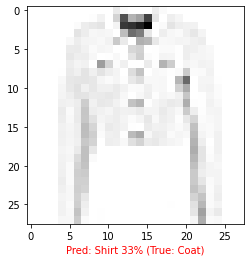

In [26]:
plot_random_image(model=model_4, images=test_data_norm, true_labels=test_labels,classes=class_names)

## What patterns is our model learning.



In [27]:
model_4.layers

In [28]:
# Extract particular layer
model_4.layers[1]

In [29]:
# Get the patterns of the layers in our network
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[-0.05890965, -0.62737507,  0.08501655, -0.0410482 ],
        [-0.05200474,  0.17377459, -0.21086672, -0.49940538],
        [ 0.01736976,  0.87506443, -0.40382937, -0.6307926 ],
        ...,
        [-0.05252568, -0.45140865,  0.20750993, -0.42344484],
        [ 0.04673509, -0.5668846 , -0.190988  , -0.05378893],
        [ 0.05969433, -0.2205846 , -0.12156998, -0.3238215 ]],
       dtype=float32),
 (784, 4))

In [30]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Biases

biases, biases.shape

(array([-0.01272832,  2.5598218 ,  2.0605848 ,  1.2161926 ], dtype=float32),
 (4,))

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_4, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
